In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from helpers.aws import execute_athena_query

seaborn.set()


Executing: select year, count(distinct(observation_station)) as num_stations from midas group by year order by year asc
Query succeeded


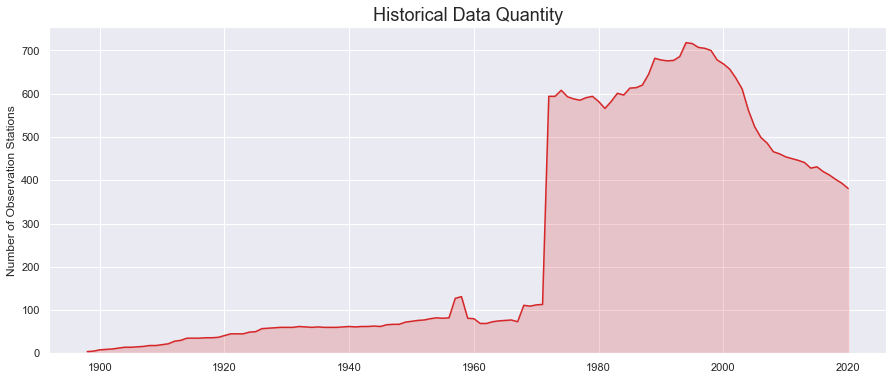

In [2]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Historical Data Quantity', fontdict={'fontsize': '18', 'fontweight' : '3'})

df = pd.read_csv(execute_athena_query("select year, count(distinct(observation_station)) as num_stations from midas group by year order by year asc"))

plt.stackplot(df.year, df.num_stations, alpha=0.2, color="tab:red")
plt.plot(df.year, df.num_stations, color="tab:red")

plt.xlabel('')
plt.ylabel('Number of Observation Stations', fontsize=12)

plt.show()

Executing: select year, max(air_temperature) as max_temp, avg(air_temperature) as mean_temp, min(air_temperature) as min_temp from midas group by year order by year asc
Query succeeded


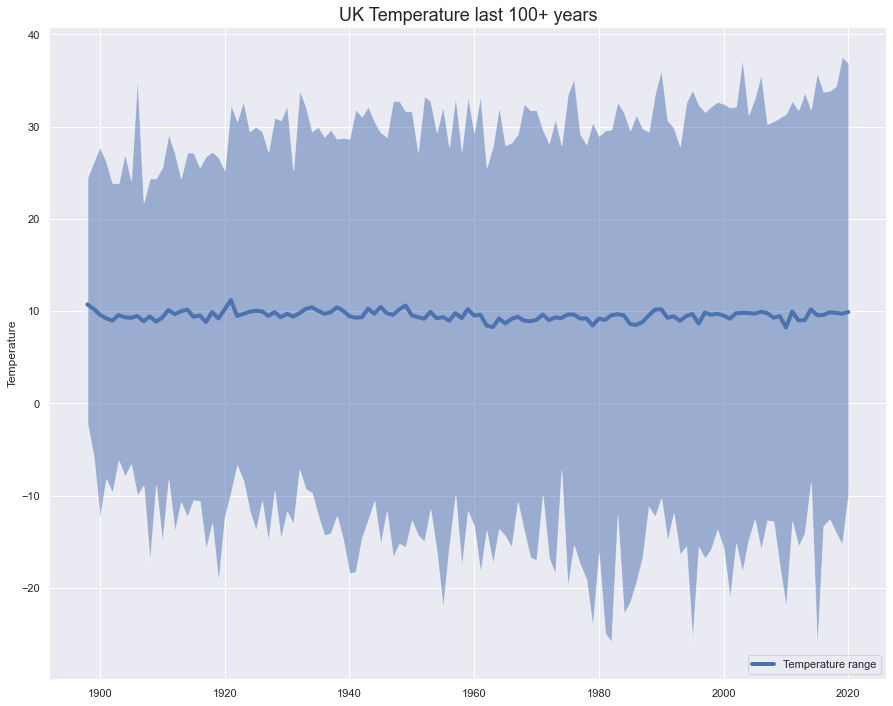

In [4]:
f, ax = plt.subplots(figsize=(15, 12))
ax.set_title('UK Temperature last 100+ years', fontdict={'fontsize': '18', 'fontweight' : '3'})

df = pd.read_csv(execute_athena_query("select year, max(air_temperature) as max_temp, avg(air_temperature) as mean_temp, min(air_temperature) as min_temp from midas group by year order by year asc"))

ax.plot(df.year, df.mean_temp, linewidth=4.0, label="Temperature range")
ax.fill_between(df.year, df.min_temp, df.max_temp, alpha=0.5)

plt.xlabel('')
plt.ylabel('Temperature', fontsize=12)
plt.legend(loc='lower right')
plt.show()